In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Machine Learning - Data Processing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Machine Learning - Evaluation
from sklearn.metrics import (
    mean_squared_error, 
    r2_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)

# For nicer plots
plt.style.use('seaborn-v0_8-whitegrid')

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("All libraries loaded successfully!")

All libraries loaded successfully!


In [2]:
df = pd.read_csv('./salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salarMachine Learning Engineery_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB

286
job_title
Data Scientist                     12388
Data Engineer                      10107
Software Engineer                   9404
Data Analyst                        7866
           6226

Name: count, dtype: int64

In [3]:
# 1. Filter and Drop immediately to keep the dataframe clean
df_cleaned = df.drop(['salary', 'salary_currency'], axis=1)

# 2. Location Logic
df_cleaned['company_location'] = np.where(df_cleaned['company_location'] == 'US', 'US', 'Other')
df_cleaned['employee_residence'] = np.where(df_cleaned['employee_residence'] == 'US', 'US', 'Other')

# 3. Job Title Logic (Updated to use df_cleaned)
top_jobs = ['Data Scientist', 'Data Engineer', 'Software Engineer', 'Data Analyst', 'Machine Learning Engineer']
df_cleaned.loc[~df_cleaned['job_title'].isin(top_jobs), 'job_title'] = 'Other'

# 4. Map Company sizes
size_map = {'S': 0, 'M': 1, 'L': 2}
df_cleaned['company_size'] = df_cleaned['company_size'].map(size_map)
experince_map = {'EN': 1, 'MI':2, 'SE':3, 'EX':4}
df_cleaned['experience'] = df_cleaned['experience_level'].map(experince_map)

# 5. One-Hot Encoding (Removed 'employment_type' from the list)
df_cleaned = pd.get_dummies(df_cleaned, columns=['experience_level', 'company_location', 'job_title', 'employee_residence', 'employment_type'], dtype=int)

#df_cleaned.info()

In [4]:
 #df_cleaned.head()
print( df_cleaned.isnull().sum())

work_year                              0
salary_in_usd                          0
remote_ratio                           0
company_size                           0
experience                             0
experience_level_EN                    0
experience_level_EX                    0
experience_level_MI                    0
experience_level_SE                    0
company_location_Other                 0
company_location_US                    0
job_title_Data Analyst                 0
job_title_Data Engineer                0
job_title_Data Scientist               0
job_title_Machine Learning Engineer    0
job_title_Other                        0
job_title_Software Engineer            0
employee_residence_Other               0
employee_residence_US                  0
employment_type_CT                     0
employment_type_FL                     0
employment_type_FT                     0
employment_type_PT                     0
dtype: int64


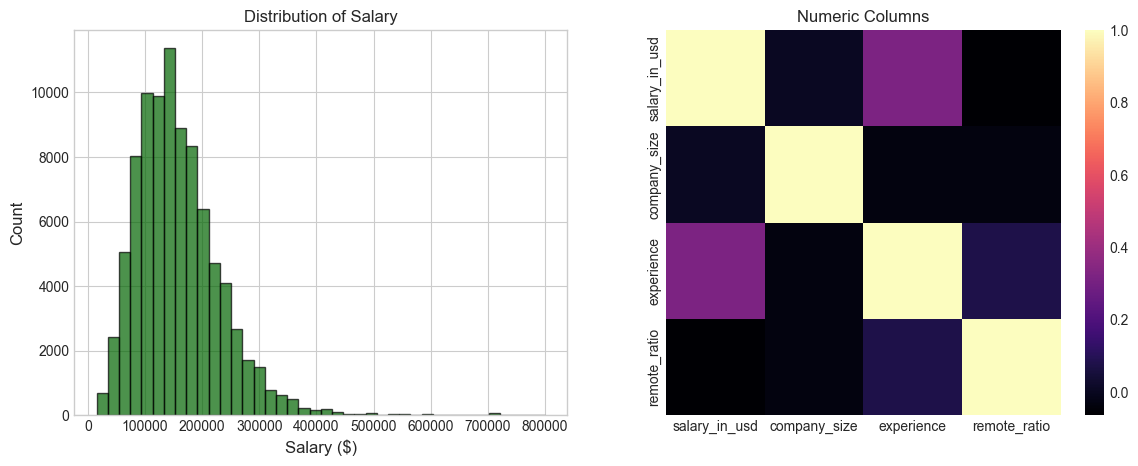

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Distribution of salary
axes[0].hist(df['salary_in_usd'], bins=40, color='darkgreen', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Salary ($)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12) 
axes[0].set_title('Distribution of Salary')


# Plot 2: Create a correlation heatmap for specific numeric columns
df_map = df_cleaned[['salary_in_usd', 'company_size','experience', 'remote_ratio']]

sns.heatmap(
    df_map.select_dtypes(include=[np.number]).corr(),
    cmap='magma'
)
axes[1].set_yticklabels(['salary_in_usd', 'company_size','experience', 'remote_ratio']),
axes[1].set_xticklabels(['salary_in_usd', 'company_size','experience', 'remote_ratio']),
axes[1].set_title('Numeric Columns')
plt.show()


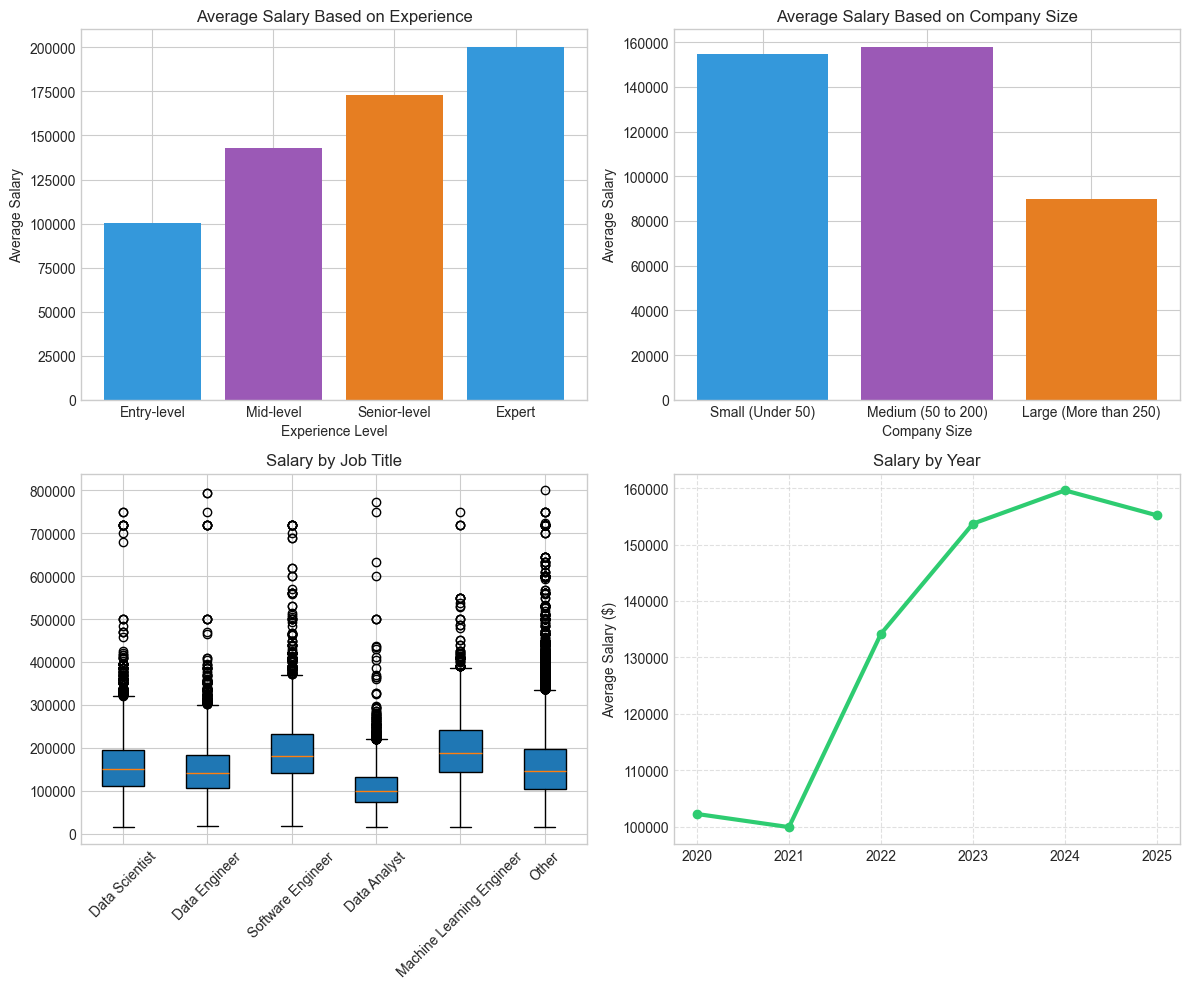

In [6]:
# Visualize survival by different features
fig, axes = plt.subplots(2,2,figsize = (12,10))

colors = {0: "#E1897F", 1: "#79813E"}

# Plot 1: Average Salary Based on Experience
exp_order = ['EN', 'MI', 'SE', 'EX']
salary_experience = df.groupby('experience_level')['salary_in_usd'].mean().reindex(exp_order)
axes[0,0].bar(salary_experience.index, salary_experience.values, color=['#3498DB', '#9B59B6', '#E67E22'])
axes[0,0].set_xlabel('Experience Level')
axes[0,0].set_ylabel('Average Salary')
axes[0,0].set_title('Average Salary Based on Experience')
axes[0,0].set_xticklabels(['Entry-level', 'Mid-level', 'Senior-level', 'Expert' ])

# Plot 2: Average Salary Based on Company Size
salary_company = df.groupby('company_size')['salary_in_usd'].mean()
axes[0,1].bar(salary_company.index, salary_company.values, color=['#3498DB', '#9B59B6', '#E67E22'])
axes[0,1].set_xlabel('Company Size')
axes[0,1].set_ylabel('Average Salary')
axes[0,1].set_title('Average Salary Based on Company Size')
axes[0,1].set_xticklabels(['Small (Under 50)','Medium (50 to 200)', 'Large (More than 250)' ])

# Plot 3: Salary Based on Job Titles
job_titles = ['Data Scientist', 'Data Engineer', 'Software Engineer', 'Data Analyst', 'Machine Learning Engineer']
salary_jobs = [df[df['job_title'] == title]['salary_in_usd'] for title in job_titles]
other_salaries = df[~df['job_title'].isin(job_titles)]['salary_in_usd']
salary_jobs.append(other_salaries)
axes[1, 0].boxplot(salary_jobs, labels=job_titles + ['Other'], patch_artist=True)
axes[1, 0].set_title('Salary by Job Title')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Salary trends for year
salary_time = df.groupby('work_year')['salary_in_usd'].mean()
axes[1,1].plot(salary_time.index, salary_time.values, marker='o', linestyle='-', color='#2ECC71', linewidth=3)
axes[1,1].set_xticks(salary_time.index)
axes[1,1].set_title('Salary by Year')
axes[1,1].set_ylabel('Average Salary ($)')
axes[1,1].grid(True, linestyle = '--', alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
feature_columns=['remote_ratio', 'company_size',
       'experience', 'experience_level_EN', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'company_location_Other',
       'company_location_US', 'job_title_Data Analyst',
       'job_title_Data Engineer', 'job_title_Data Scientist',
       'job_title_Machine Learning Engineer', 'job_title_Other',
       'job_title_Software Engineer', 'employee_residence_Other',
       'employee_residence_US', 'employment_type_CT', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT']

Index(['work_year', 'salary_in_usd', 'remote_ratio', 'company_size',
       'experience', 'experience_level_EN', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'company_location_Other',
       'company_location_US', 'job_title_Data Analyst',
       'job_title_Data Engineer', 'job_title_Data Scientist',
       'job_title_Machine Learning Engineer', 'job_title_Other',
       'job_title_Software Engineer', 'employee_residence_Other',
       'employee_residence_US', 'employment_type_CT', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT'],
      dtype='object')


In [ ]:
Index(['work_year', 'salary_in_usd', 'remote_ratio', 'company_size',
       'experience', 'experience_level_EN', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'company_location_Other',
       'company_location_US', 'job_title_Data Analyst',
       'job_title_Data Engineer', 'job_title_Data Scientist',
       'job_title_Machine Learning Engineer', 'job_title_Other',
       'job_title_Software Engineer', 'employee_residence_Other',
       'employee_residence_US', 'employment_type_CT', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT'],
      dtype='object')

In [15]:

# Create feature matrix
X = df_cleaned[feature_columns]

# Create target variables
y_data= df_cleaned['salary_in_usd']

RANDOM_STATE = 42  # This is standard in industry!

X_train, X_test, y_train, y_test = train_test_split(
    X, y_data, test_size=0.2, random_state=RANDOM_STATE
)

print("Data split complete!")
print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Data split complete!

Training samples: 70867
Testing samples: 17717


In [17]:
#Note: Use scaled data for Linear/Logistic Regression and Ridge/Lasso
# Scale the features 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)        # Transform test data

# Convert back to DataFrame for easier use
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_columns, index=X_test.index)

print("Features scaled!")

Features scaled!
